Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

### EXERCÍCIO 01

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits

digits = load_digits()

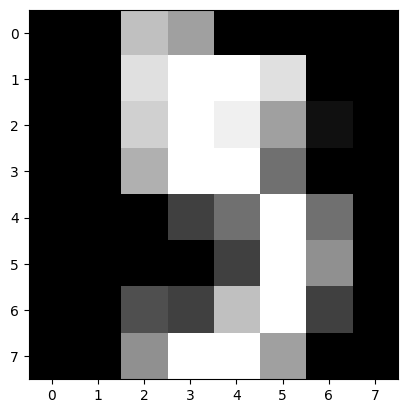

In [2]:
plt.gray()
plt.imshow(digits.images[5])
plt.show()

In [3]:
X_digits = digits.data
y_digits = digits.target

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=42)

In [4]:
print(f'Tamanho de training dataset: {X_train.shape}, {y_train.shape}')
print(f'Tamanho de testing dataset: {X_test.shape}, {y_test.shape}')

Tamanho de training dataset: (1257, 64), (1257,)
Tamanho de testing dataset: (540, 64), (540,)


In [5]:
def grid_search(param_grid,classifier):
    grid_cv = GridSearchCV(classifier(random_state=101),param_grid,verbose=3)
    grid_cv.fit(X_train,y_train)
    print(f'Melhores params: {grid_cv.best_params_}')
    return f'Melhor Est.: {grid_cv.best_estimator_}'

In [14]:
param_grid = {'criterion':['gini','entropy'],'max_depth':[None,12,16,20,24,28,32,36,40,90,120,150],"min_samples_leaf":[1,2,3,4], "min_samples_split":[2,3,4,5]}
grid_search(param_grid,DecisionTreeClassifier)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.845 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.813 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.809 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.849 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.841 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=3;, score=0.813 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=3;, score=0.810 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=3;, score=0.821 total time=

"Melhor Est.: DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,\n                       min_samples_split=5, random_state=101)"

In [11]:
# Executando com os params escolhidos
from sklearn.metrics import accuracy_score, classification_report

dec_tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2, min_samples_split=5, random_state=101)
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)
print(f'Precisão: {dec_tree.score(X_test, y_test)}')

Precisão: 0.8833333333333333


In [12]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        53
           1       0.87      0.92      0.89        50
           2       0.86      0.89      0.88        47
           3       0.87      0.89      0.88        54
           4       0.86      0.80      0.83        60
           5       0.88      0.88      0.88        66
           6       0.98      0.94      0.96        53
           7       0.91      0.89      0.90        55
           8       0.82      0.84      0.83        43
           9       0.89      0.83      0.86        59

    accuracy                           0.88       540
   macro avg       0.88      0.88      0.88       540
weighted avg       0.88      0.88      0.88       540



In [13]:
print(confusion_matrix(y_test, y_pred))

[[51  0  0  0  1  1  0  0  0  0]
 [ 0 46  0  1  1  0  0  0  1  1]
 [ 0  1 42  1  0  0  1  0  2  0]
 [ 0  1  2 48  0  1  0  0  1  1]
 [ 3  1  1  1 48  1  0  3  2  0]
 [ 0  2  0  3  1 58  0  0  1  1]
 [ 1  1  0  0  1  0 50  0  0  0]
 [ 0  0  3  0  0  0  0 49  0  3]
 [ 0  1  1  0  2  3  0  0 36  0]
 [ 2  0  0  1  2  2  0  2  1 49]]


### EXERCÍCIO 02

In [14]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

# isolando features de novo
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=42)

# testando com gridsearch 
#params = {'max_depth':[None,1,5,10,20,30,40,50],'learning_rate': [1, 0.1, 0.01, 0.001],'subsample': [0.25, 0.5, 0.7, 1], 'n_estimators':[None,10,40,50,60,70,80,90,100]}

params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.3],
}

grid_search(params,xgb.XGBRegressor)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
[CV 1/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7;, score=0.484 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7;, score=0.452 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7;, score=0.458 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7;, score=0.437 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7;, score=0.429 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample

'Melhor Est.: XGBRegressor(base_score=None, booster=None, callbacks=None,\n             colsample_bylevel=None, colsample_bynode=None,\n             colsample_bytree=0.7, device=None, early_stopping_rounds=None,\n             enable_categorical=False, eval_metric=None, feature_types=None,\n             gamma=0, grow_policy=None, importance_type=None,\n             interaction_constraints=None, learning_rate=0.1, max_bin=None,\n             max_cat_threshold=None, max_cat_to_onehot=None,\n             max_delta_step=None, max_depth=5, max_leaves=None,\n             min_child_weight=5, missing=nan, monotone_constraints=None,\n             multi_strategy=None, n_estimators=300, n_jobs=None,\n             num_parallel_tree=None, random_state=101, ...)'

In [15]:
# executando com params escolhidos 

xgbc = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300, random_state=101, subsample= 0.9)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
print(f'Precisao: {xgbc.score(X_test, y_test)}')

Precisao: 0.8941904306411743


In [31]:
y_pred

array([5.99333333e+00, 7.78666667e+00, 3.69444444e+00, 6.60000000e+00,
       2.90666667e+00, 1.77333333e+00, 4.99333333e+00, 2.54000000e+00,
       5.17333333e+00, 3.40333333e+00, 2.19333333e+00, 6.41666667e+00,
       4.85333333e+00, 0.00000000e+00, 3.95000000e+00, 2.29000000e+00,
       3.22333333e+00, 6.74666667e+00, 7.55333333e+00, 7.08000000e+00,
       4.17333333e+00, 3.29000000e+00, 7.44666667e+00, 6.66000000e+00,
       4.89690476e+00, 5.64666667e+00, 4.13000000e+00, 5.02000000e+00,
       5.73000000e+00, 3.80333333e+00, 4.03444444e+00, 8.14000000e+00,
       2.22666667e+00, 3.91111111e+00, 3.97000000e+00, 5.98666667e+00,
       8.21333333e+00, 4.01666667e+00, 6.76333333e+00, 5.98000000e+00,
       6.02000000e+00, 6.80666667e+00, 1.16000000e+00, 3.30666667e+00,
       4.81000000e+00, 1.55000000e+00, 3.05666667e+00, 9.33333333e-02,
       5.98333333e+00, 5.01000000e+00, 5.44000000e+00, 1.32666667e+00,
       5.67000000e+00, 5.13000000e+00, 5.60000000e+00, 3.13333333e-01,
      

In [16]:
# testando com outro ensemble

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search(params,RandomForestRegressor)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.856 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.805 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.833 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.823 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.786 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.857 total time=   0.4s
[CV 2/

[CV 2/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.806 total time=   0.5s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.833 total time=   0.6s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.811 total time=   0.5s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.785 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.842 total time=   0.6s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.805 total time=   0.7s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_sa

/home/codespace/.local/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Melhores params: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


"Melhor Est.: RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',\n                      n_estimators=300, random_state=101)"

In [19]:
# executando com params escolhidos 

rft = RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=300)
rft.fit(X_train, y_train)
y_pred = rft.predict(X_test)
print(f'Precisao: {rft.score(X_test, y_test)}')

Precisao: 0.8810896159640311


### EXERCÍCIO 03

<Figure size 2000x1000 with 0 Axes>

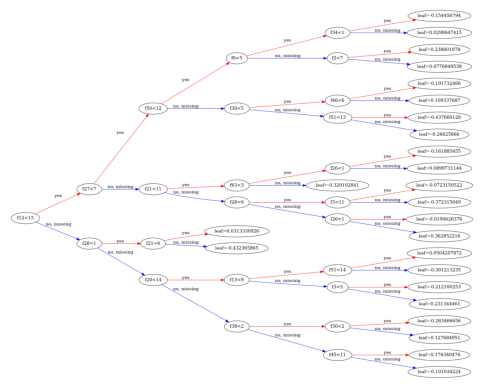

In [25]:
from xgboost import plot_tree

# primeira arvore de decisao

plt.figure(figsize=(20, 10))
plot_tree(xgbc, num_trees=0, rankdir='LR')
plt.show()

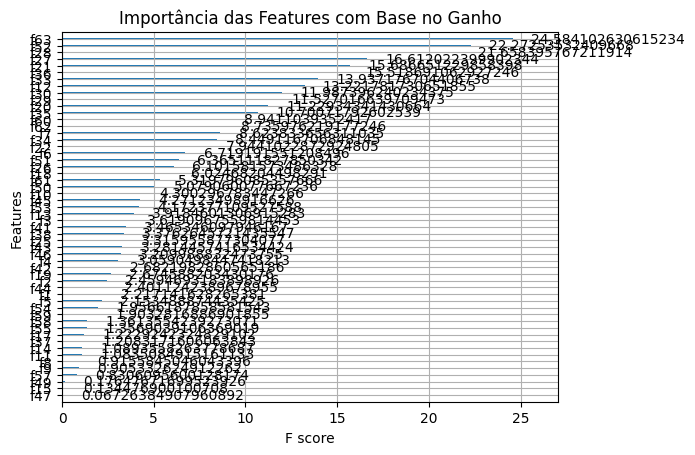

In [27]:
# feature importance 

xgb.plot_importance(xgbc, importance_type='gain', title="Importância das Features com Base no Ganho")
plt.show()

<Figure size 1000x800 with 0 Axes>

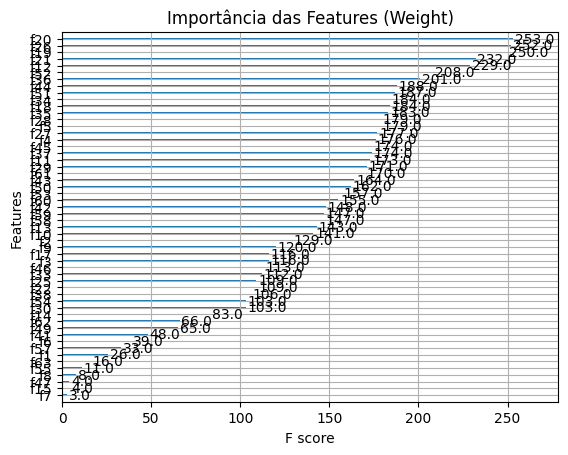

In [29]:
# calculando outras features 

plt.figure(figsize=(10, 8))
xgb.plot_importance(xgbc, importance_type='weight', title="Importância das Features (Weight)")
plt.show()

<Figure size 1000x800 with 0 Axes>

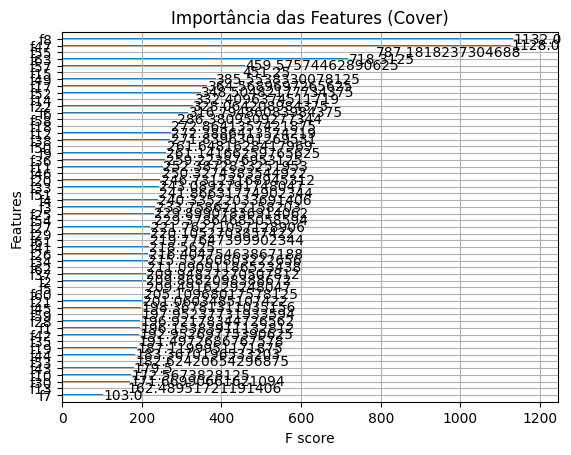

In [30]:
plt.figure(figsize=(10, 8))
xgb.plot_importance(xgbc, importance_type='cover', title="Importância das Features (Cover)")
plt.show()

In [20]:
import pickle

# exportando o melhor modelo 

filename = 'xgboost.pkl'
pickle.dump(xgbc, open(filename, 'wb'))